
==== Results for Heart Disease dataset ====

SVM:
Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


Logistic Regression:
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


Random Forest:
Accuracy: 0.8667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.8

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:52:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Forest:
Accuracy: 0.7597
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


XGBoost:
Accuracy: 0.7338
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


==== Results for Breast Cancer dataset ====

SVM:
Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:52:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Forest:
Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


XGBoost:
Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:52:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


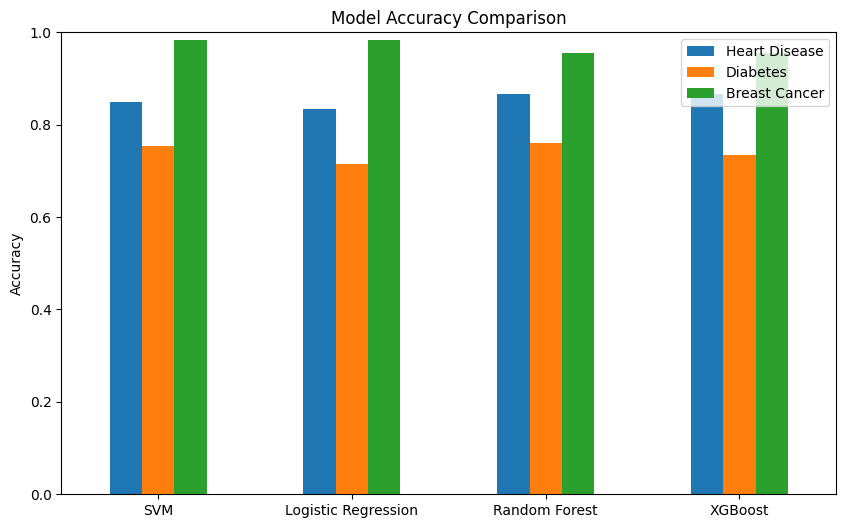

In [1]:
# 1. Install required libraries
!pip install xgboost scikit-learn pandas numpy seaborn matplotlib --quiet

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# For breast cancer built-in dataset
from sklearn.datasets import load_breast_cancer

# 3. Define training and evaluation function
def train_and_evaluate(X, y, dataset_name):
    # Split dataset into 80% train, 20% test, stratified by label
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    results = {}
    models = {
        'SVM': SVC(kernel='rbf', probability=True, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    print(f"\n==== Results for {dataset_name} dataset ====")
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"\n{model_name}:")
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))
        results[model_name] = acc
    return results

    # 4. Load datasets

# A. Heart Disease dataset
heart_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_cols = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]
heart = pd.read_csv(heart_url, names=heart_cols, na_values="?")
heart = heart.dropna().reset_index(drop=True)
# Convert target to binary: 0 = no disease, 1 = disease (presence of heart disease)
heart['target'] = (heart['target'] > 0).astype(int)
X_heart = heart.drop('target', axis=1)
y_heart = heart['target']

# B. Diabetes dataset
diabetes_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
diabetes_cols = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'target'
]
diabetes = pd.read_csv(diabetes_url, names=diabetes_cols)
X_diabetes = diabetes.drop('target', axis=1)
y_diabetes = diabetes['target']

# C. Breast Cancer dataset using sklearn built-in dataset
breast_data = load_breast_cancer()
X_breast = pd.DataFrame(breast_data.data, columns=breast_data.feature_names)
y_breast = pd.Series(breast_data.target)

# 5. Train and evaluate models on each dataset
heart_results = train_and_evaluate(X_heart, y_heart, 'Heart Disease')
diabetes_results = train_and_evaluate(X_diabetes, y_diabetes, 'Diabetes')
breast_results = train_and_evaluate(X_breast, y_breast, 'Breast Cancer')


# 6. Plot comparison of accuracies
results_df = pd.DataFrame({
    "Heart Disease": heart_results,
    "Diabetes": diabetes_results,
    "Breast Cancer": breast_results
})
results_df.plot(kind='bar', figsize=(10,6))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()